Homework 4 for the Introduction to Machine Learning in Materials Science
 - Instructor Sergei V. Kalinin

Action items:
- Please add your name and department
- To submit the homework, share the Colab with my Gmail address

# Part I. ROC and AUC

Let's create a half-moon data set.

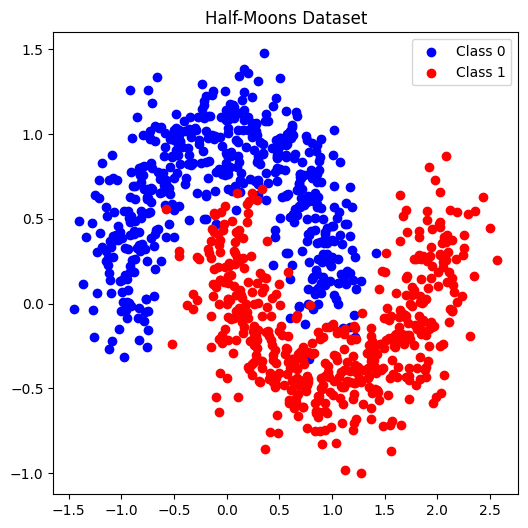

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate the half-moons dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Visualize the dataset
plt.figure(figsize=(6,6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
plt.title('Half-Moons Dataset')
plt.legend()
plt.show()

Problem 1: Choose a classifier and classify the points. Obviously, start with train/test split. You can experiment with different classifiers (e.g., decision tree, k-NN, support vector machine) and observe how the decision boundary and ROC curve change.


In [ ]:
!pip install KNeighborsClassifier

ERROR: Could not find a version that satisfies the requirement KNeighborsClassifier (from versions: none)
ERROR: No matching distribution found for KNeighborsClassifier


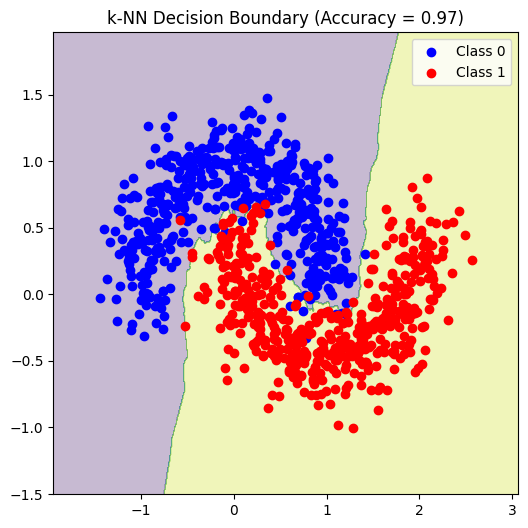

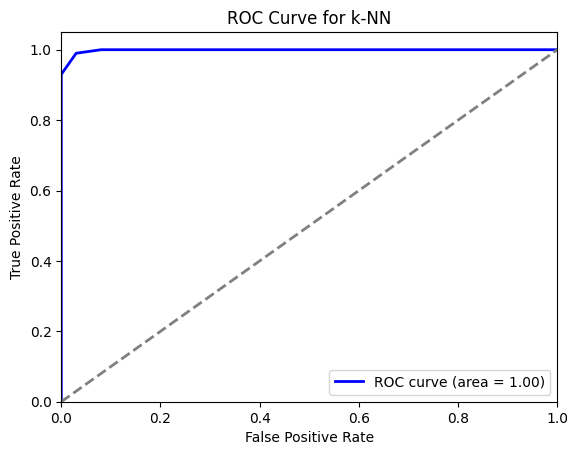

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_score = knn.score(X_test, y_test)


plt.figure(figsize=(6, 6))
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
plt.title('k-NN Decision Boundary (Accuracy = {:.2f})'.format(knn_score))
plt.legend()
plt.show()


y_prob_knn = knn.predict_proba(X_test)[:, 1]  # Use predict_proba for ROC
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for k-NN')
plt.legend(loc="lower right")
plt.show()




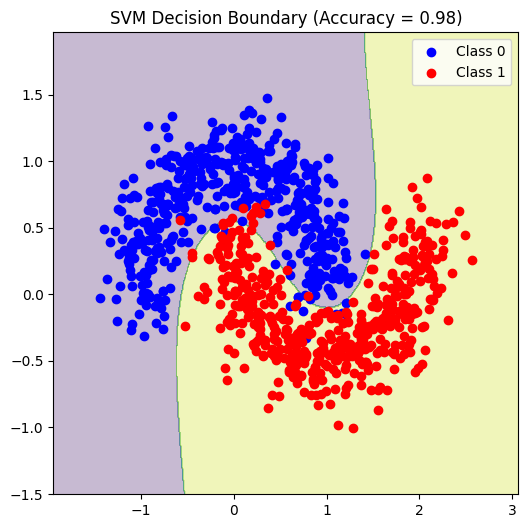

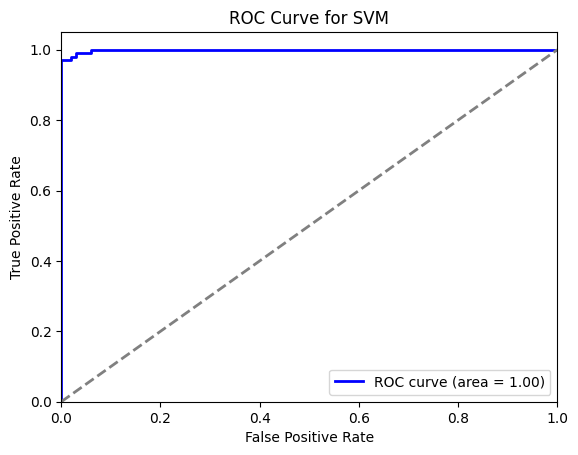

In [ ]:
#Using SVM

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_score = svm.score(X_test, y_test)

plt.figure(figsize=(6, 6))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
plt.title('SVM Decision Boundary (Accuracy = {:.2f})'.format(svm_score))
plt.legend()
plt.show()


y_prob_svm = svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc="lower right")
plt.show()

Problem 2: Explain why you chose it and how you think it will perform on this dataset.

Answer 2:
Comparative of KNN and SVM classifier was done. Although both of them indicated closer outcome, but SVM worked better for non-linear data and does not tend to overfitting.


Problem 3: Plot the decision boundary of your chosen classifier. How well does the decision boundary separate the two classes?

k-NN Accuracy: 0.97


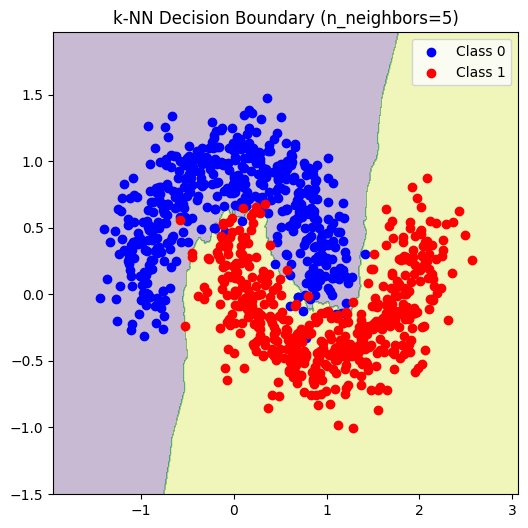

In [20]:


X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
    plt.title(title)
    plt.legend()
    plt.show()

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print(f"k-NN Accuracy: {knn_score:.2f}")

plot_decision_boundary(knn, X, y, 'k-NN Decision Boundary (n_neighbors=5)')




SVM Accuracy: 0.98


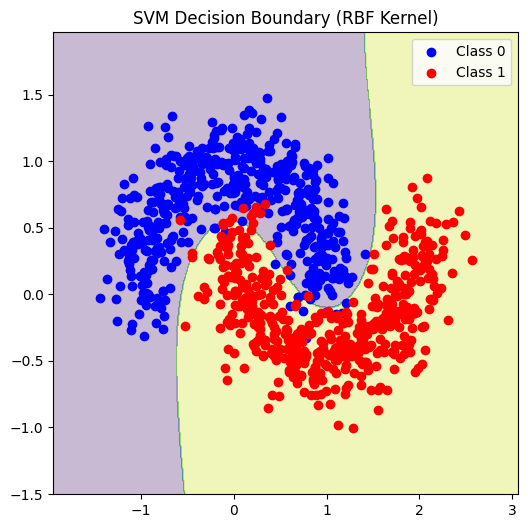

In [21]:
# Step 4: Train and evaluate SVM classifier
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
print(f"SVM Accuracy: {svm_score:.2f}")

# Plot decision boundary for SVM
plot_decision_boundary(svm, X, y, 'SVM Decision Boundary (RBF Kernel)')

#SVM provides a more smoother boundary with high accuracy

Problem 4: Plot the ROC curve for your classifier and compute the AUC. Compare the AUC with other classifiers if you tried different ones.

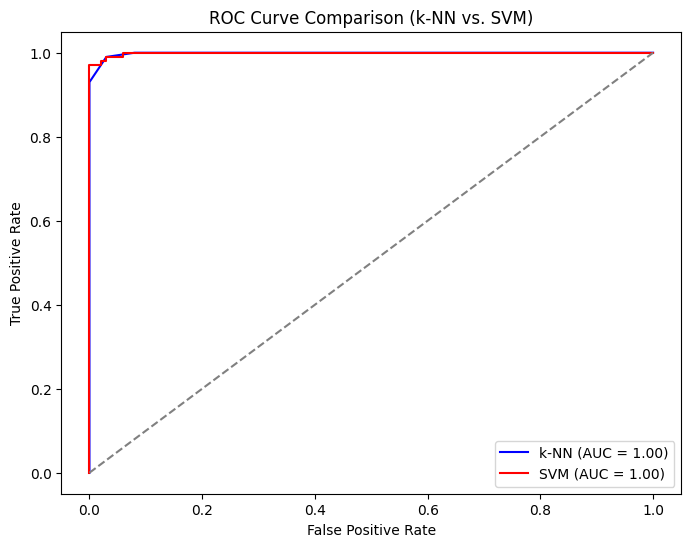

AUC for k-NN: 1.00
AUC for SVM: 1.00


In [17]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_prob_knn = knn.predict_proba(X_test)[:, 1]

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

y_prob_svm = svm.predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

auc_knn = roc_auc_score(y_test, y_prob_knn)
auc_svm = roc_auc_score(y_test, y_prob_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', label=f'k-NN (AUC = {auc_knn:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', label=f'SVM (AUC = {auc_svm:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('ROC Curve Comparison (k-NN vs. SVM)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

print(f"AUC for k-NN: {auc_knn:.2f}")
print(f"AUC for SVM: {auc_svm:.2f}")


Problem 5: Explain the relationship between the decision boundary and the ROC curve.
- What happens when the classifier is more flexible (e.g., a decision tree with more depth)?
- What are the trade-offs between sensitivity and specificity as seen in the ROC curve?

Answer 5:

In [2]:
#ROC curve will shown better representation of data if the decision boundary is smooth: ability to separate classes in proper way, otherwise it will tend to overfit.
#If flexible classifier is use, the decision boundary will be properly categorized or tuned
# Sensitivity increases will categorize more negative instances will be classified as positve. and specificity increases will do vice versa.

# Part II: Class probabilities

Problem 6:
- Import the Iris data set
- Select two features
- Build logistic regression classifier
- Visualize the class probabilities
- Plot the decision surface for thresholds 0.1 and 0.9



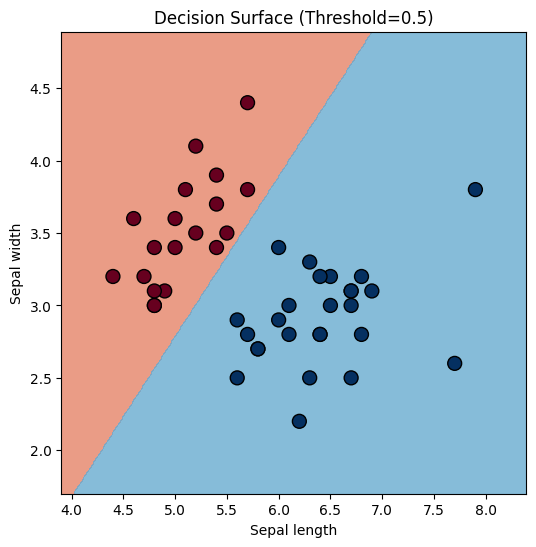

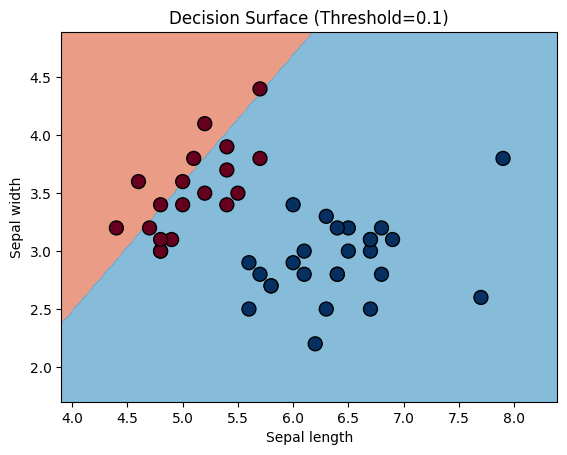

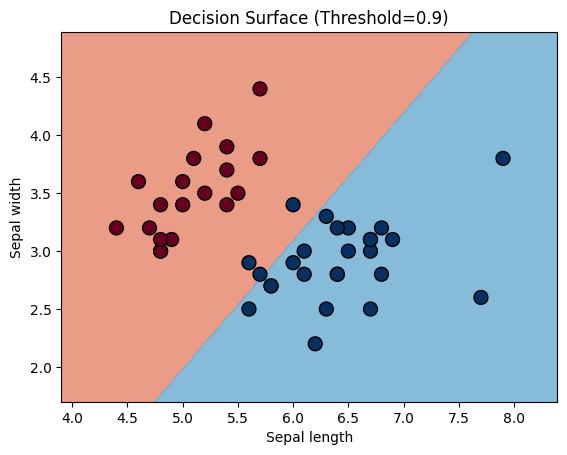

In [16]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

def plot_decision_surface(clf, X, y, threshold=0.5):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    probs = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = (probs > threshold).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, cmap=plt.cm.RdBu)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(f'Decision Surface (Threshold={threshold})')
    plt.show()

plt.figure(figsize=(6, 6))
plot_decision_surface(clf, X_test, y_test, threshold=0.5)

plot_decision_surface(clf, X_test, y_test, threshold=0.1)

plot_decision_surface(clf, X_test, y_test, threshold=0.9)


Problem 7: Explain how these decision surfaces relate to ROC

Answer 7:

# Part III. Overfitting and Underfitting

Let's create a data set along with train/test data

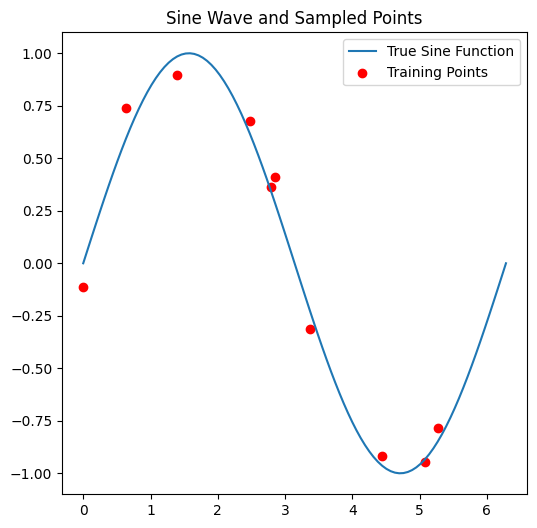

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate 100 points from a sine function between 0 and 2π
X_full = np.linspace(0, 2 * np.pi, 100)
y_full = np.sin(X_full)

# Randomly select 10 points for the dataset
indices = np.random.choice(len(X_full), 10, replace=False)
X_train = X_full[indices]
y_train = y_full[indices] + np.random.normal(0, 0.1, len(indices))

# Sort the selected points for better visualization
X_train, y_train = zip(*sorted(zip(X_train, y_train)))

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Create test set (remaining points)
X_test = np.delete(X_full, indices)
y_test = np.delete(y_full, indices)

# Plot the full sine wave and training points
plt.figure(figsize=(6, 6))
plt.plot(X_full, y_full, label='True Sine Function')
plt.scatter(X_train, y_train, color='red', label='Training Points')
plt.title('Sine Wave and Sampled Points')
plt.legend()
plt.show()

Problem 8: Fit the data with the polynomials with  degrees = np.arange(1, 15) and calculate train and test error as a function of polynomial degree. Hint - use the log scale to visualize the data

<ipython-input-15-853ca5c87f18>:28: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X_train, y_train, degree)
<ipython-input-15-853ca5c87f18>:28: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X_train, y_train, degree)
<ipython-input-15-853ca5c87f18>:28: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X_train, y_train, degree)
<ipython-input-15-853ca5c87f18>:28: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X_train, y_train, degree)
<ipython-input-15-853ca5c87f18>:28: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X_train, y_train, degree)


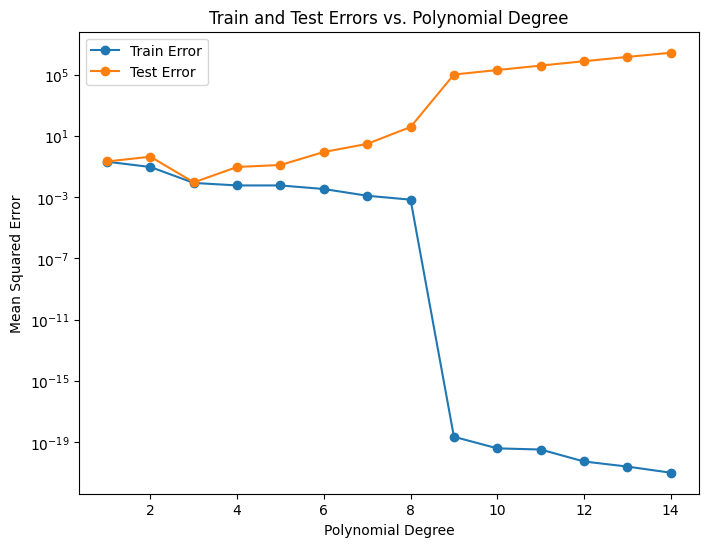

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

np.random.seed(42)

X_full = np.linspace(0, 2 * np.pi, 100)
y_full = np.sin(X_full)

indices = np.random.choice(len(X_full), 10, replace=False)
X_train = X_full[indices]
y_train = y_full[indices] + np.random.normal(0, 0.1, len(indices))

X_train, y_train = zip(*sorted(zip(X_train, y_train)))

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.delete(X_full, indices)
y_test = np.delete(y_full, indices)

degrees = np.arange(1, 15)

train_errors = []
test_errors = []

for degree in degrees:
    coeffs = np.polyfit(X_train, y_train, degree)

    y_train_pred = np.polyval(coeffs, X_train)
    y_test_pred = np.polyval(coeffs, X_test)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(8, 6))
plt.plot(degrees, train_errors, label='Train Error', marker='o')
plt.plot(degrees, test_errors, label='Test Error', marker='o')
plt.yscale('log')  # Use log scale for the y-axis
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Errors vs. Polynomial Degree')
plt.legend()
plt.show()


Problem 9: Plot the sine wave, training points, and fitted polynomials of different degrees

<ipython-input-14-d77cb3af7e71>:9: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X_train, y_train, degree)
<ipython-input-14-d77cb3af7e71>:9: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X_train, y_train, degree)
<ipython-input-14-d77cb3af7e71>:9: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X_train, y_train, degree)


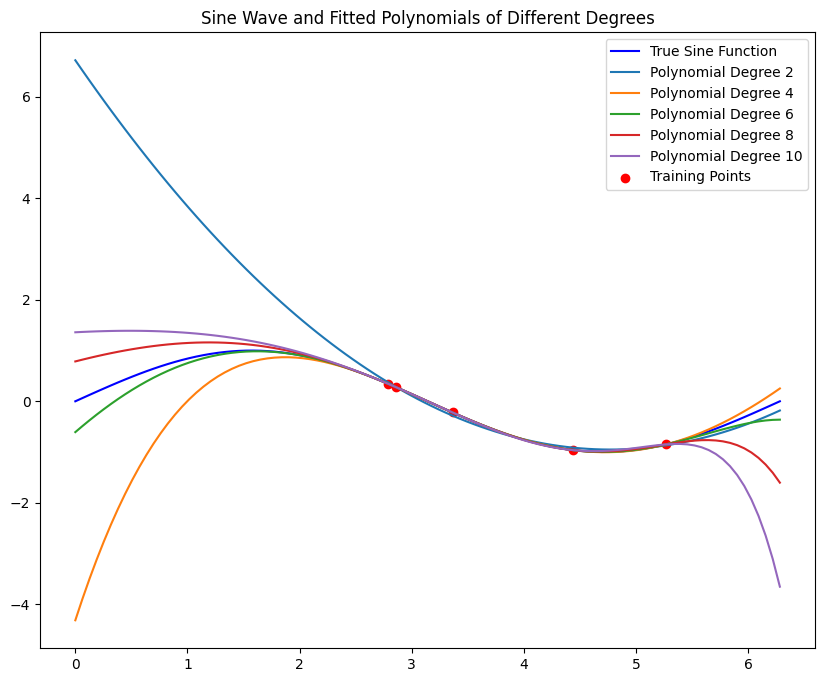

In [14]:
degrees_to_plot = [2, 4, 6, 8, 10]

X_smooth = np.linspace(0, 2 * np.pi, 100)

plt.figure(figsize=(10, 8))
plt.plot(X_full, y_full, label='True Sine Function', color='blue')

for degree in degrees_to_plot:
    coeffs = np.polyfit(X_train, y_train, degree)
    y_smooth_pred = np.polyval(coeffs, X_smooth)
    plt.plot(X_smooth, y_smooth_pred, label=f'Polynomial Degree {degree}')

plt.scatter(X_train, y_train, color='red', label='Training Points')

plt.title('Sine Wave and Fitted Polynomials of Different Degrees')
plt.legend()
plt.show()


Problem 10: Take the polynomial of degree 8, and explore how the learnign curve (train and test error as a function of number of samples) look like.

<ipython-input-13-263bf45ab933>:11: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X_subset, y_subset, degree)
<ipython-input-13-263bf45ab933>:11: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X_subset, y_subset, degree)
<ipython-input-13-263bf45ab933>:11: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X_subset, y_subset, degree)
<ipython-input-13-263bf45ab933>:11: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X_subset, y_subset, degree)


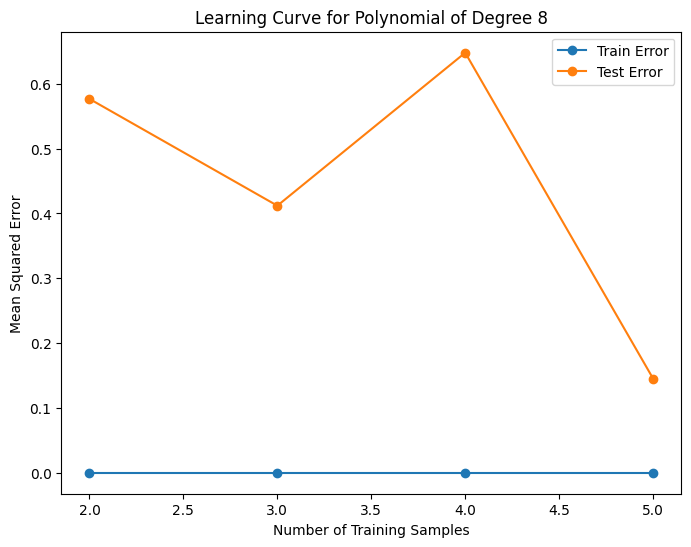

In [13]:
degree = 8

train_sizes = np.arange(2, len(X_train) + 1)
train_errors_lc = []
test_errors_lc = []

for size in train_sizes:
    X_subset = X_train[:size]
    y_subset = y_train[:size]

    coeffs = np.polyfit(X_subset, y_subset, degree)

    y_train_pred_lc = np.polyval(coeffs, X_subset)
    y_test_pred_lc = np.polyval(coeffs, X_test)

    train_errors_lc.append(mean_squared_error(y_subset, y_train_pred_lc))
    test_errors_lc.append(mean_squared_error(y_test, y_test_pred_lc))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_errors_lc, label='Train Error', marker='o')
plt.plot(train_sizes, test_errors_lc, label='Test Error', marker='o')
plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve for Polynomial of Degree 8')
plt.legend()
plt.show()


# Part IV. Regularized regression

Take this data set

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

X_full = np.linspace(0, 2 * np.pi, 100)
y_full = np.sin(X_full)

np.random.seed(42)
indices = np.random.choice(len(X_full), 5, replace=False)
X_train = X_full[indices]
y_train = y_full[indices]

X_test = np.delete(X_full, indices)
y_test = np.delete(y_full, indices)

Problem 11: Realize and visualize results of the Ridge regression for polynomial fit of degree 8.

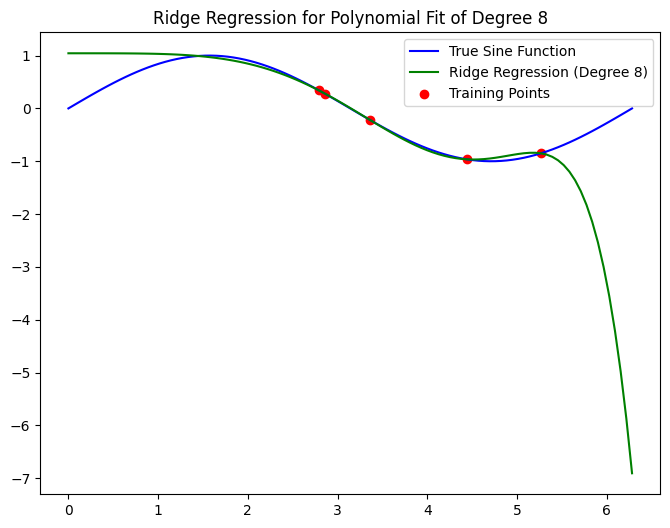

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

degree = 8
poly = PolynomialFeatures(degree=degree)

X_train_poly = poly.fit_transform(X_train[:, np.newaxis])
X_test_poly = poly.transform(X_test[:, np.newaxis])

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)


y_train_pred = ridge_model.predict(X_train_poly)
y_test_pred = ridge_model.predict(X_test_poly)

X_smooth = np.linspace(0, 2 * np.pi, 100)
X_smooth_poly = poly.transform(X_smooth[:, np.newaxis])
y_smooth_pred = ridge_model.predict(X_smooth_poly)

plt.figure(figsize=(8, 6))
plt.plot(X_full, y_full, label='True Sine Function', color='blue')
plt.plot(X_smooth, y_smooth_pred, label='Ridge Regression (Degree 8)', color='green')
plt.scatter(X_train, y_train, color='red', label='Training Points')
plt.title('Ridge Regression for Polynomial Fit of Degree 8')
plt.legend()
plt.show()


Problem 12:
- Experiment with different regularization strength. How large should be alpha to force the function to be linear?
- What is the optimal value of alpha for fit?

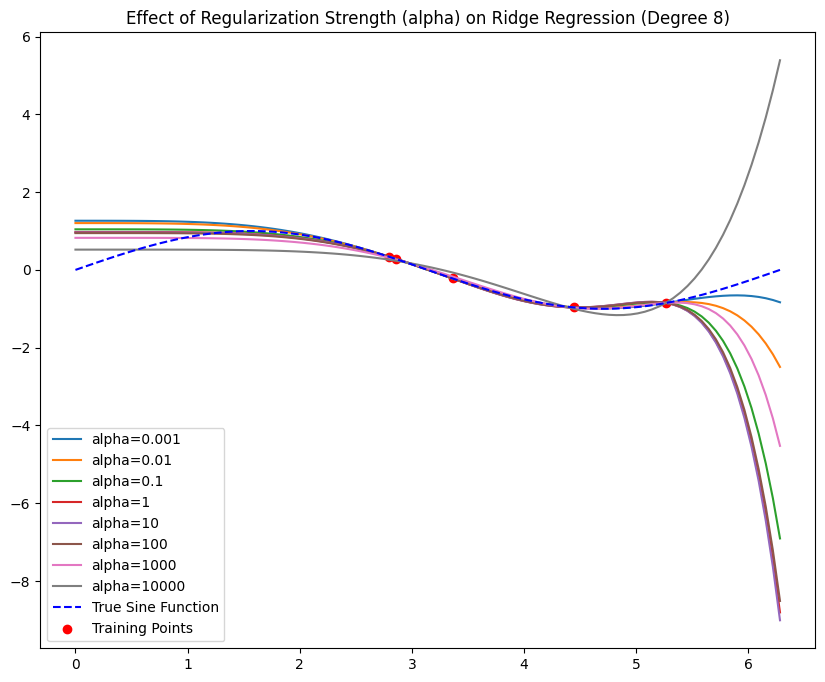

In [12]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

plt.figure(figsize=(10, 8))

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly, y_train)

    y_smooth_pred = ridge_model.predict(X_smooth_poly)

    plt.plot(X_smooth, y_smooth_pred, label=f'alpha={alpha}')

plt.plot(X_full, y_full, label='True Sine Function', color='blue', linestyle='dashed')
plt.scatter(X_train, y_train, color='red', label='Training Points')

plt.title('Effect of Regularization Strength (alpha) on Ridge Regression (Degree 8)')
plt.legend()
plt.show()


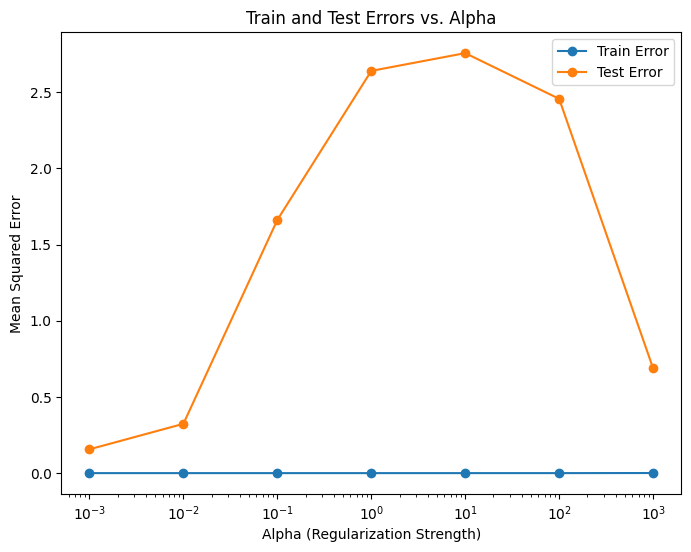

In [11]:
train_errors = []
test_errors = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly, y_train)

    y_train_pred = ridge_model.predict(X_train_poly)
    y_test_pred = ridge_model.predict(X_test_poly)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(8, 6))
plt.plot(alphas, train_errors, label='Train Error', marker='o')
plt.plot(alphas, test_errors, label='Test Error', marker='o')
plt.xscale('log')  # Use log scale for alpha
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Errors vs. Alpha')
plt.legend()
plt.show()


Answer 12: alpha value: 0.001